In [4]:
import http.client
import pandas as pd
import json
import datetime
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Creating empty dataframe
all_players = pd.DataFrame()
#Creating range to iterate over
top30pages=list(range(1,30))
#reading in data from API page by page.
for x in top30pages:
    conn = http.client.HTTPSConnection("api-football-v1.p.rapidapi.com")
    headers = {
        'X-RapidAPI-Key': "e57abdb685mshaba341462f93399p186490jsn03fc57c17515",
        'X-RapidAPI-Host': "api-football-v1.p.rapidapi.com"
        }
    conn.request("GET", ("/v3/players?league=39&season=2018&page=" + str(x)), headers=headers)
    res = conn.getresponse()
    data = res.read()
    player_stats =(data.decode("utf-8"))
    #using json.loads to turn data into a dictionary
    player_stats = json.loads(player_stats)
    #creating empty lists and dataframes that will be filled in the loop.
    player_names=[]
    player_apps=[]
    team=[]
    shots = pd.DataFrame()
    goals = pd.DataFrame()
    passes = pd.DataFrame()
    tackles = pd.DataFrame()
    duels = pd.DataFrame()
    dribbles = pd.DataFrame()
    #for each of the pages, creating a DF of the stats we want for each of the players and combining them together.
    for i in range(0,20):
        shotsDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['shots'],orient='index').transpose()
        shots = shots.append(shotsDf)
        goalsDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['goals'],orient='index').transpose()
        goals = goals.append(goalsDf)
        passesDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['passes'],orient='index').transpose()
        passes = passes.append(passesDf)
        tacklesDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['tackles'],orient='index').transpose()
        tackles = tackles.append(tacklesDf)
        duelsDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['duels'],orient='index').transpose()
        duels = duels.append(duelsDf)
        dribblesDf = pd.DataFrame.from_dict(player_stats['response'][i]['statistics'][0]['dribbles'],orient='index').transpose()
        dribbles = dribbles.append(dribblesDf)
        player_names.append(player_stats['response'][i]['player']['name'])
        player_apps.append(player_stats['response'][i]['statistics'][0]['games']['appearences'])
        team.append(player_stats['response'][i]['statistics'][0]['team']['name'])
    allStats = pd.concat([shots, goals, passes, tackles, duels, dribbles], axis=1)
    allStats['name'] = player_names
    allStats['appearances'] = player_apps
    allStats['team'] = team
    first_column = allStats.pop('name')
    allStats.insert(0, 'name', first_column)
    #appending all of the dataframes together
    all_players=all_players.append(allStats)

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shots = shots.append(shotsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = goals.append(goalsDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = passes.append(passesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2280544454.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tackles = tackles.append(tacklesDf)
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\228054445

In [6]:
#renaming column names so it is easier to understand
all_players.rename({'name': 'name', 'total': 'shots','on': 'shots_on_target','conceded': 'goals_conceded','key':'key_passes','accuracy':'pass_acuuracy','won':'duels_won','attempts': 'dribble_attempts', 'success':'successful_dribbles'}, axis=1, inplace=True)
all_players.columns.values[3] = 'goals'
all_players.columns.values[7] = 'passes'
all_players.columns.values[10] = 'tackles'
all_players.columns.values[13] = 'duels'

In [7]:
#getting rid of special characters such as vowels we tildes.
all_players['name']=all_players['name'].apply(unidecode)

In [8]:
#splitting name into first and last and creating separate columns for each
name_split = all_players['name'].str.split(". ", n = 1, expand = True)
all_players["last_name"]= name_split[1]
all_players["first_letter"]= name_split[0]

In [9]:
#some names were formatted differently, so splitting again to get proper format of names
name_split1 = all_players['last_name'].str.split(" ", n = 1, expand = True)
all_players["name1"]= name_split1[1]
all_players["lastName1"]= name_split1[0]

In [10]:
#filling all null columns with the full name of player. This is for some players such as Neymar that go by a single name.
all_players['lastName1'] = all_players['lastName1']. fillna(all_players['name'])

In [11]:
#making the last name of each player lowercase so it is easier to merge later
all_players['lastName1']=all_players['lastName1'].str.lower()

In [12]:
#creating a variable for first initial to differentiate players with same first name.
all_players['first_initial'] = all_players['first_letter'].astype(str).str[0].str.upper()

In [15]:
#read in CSVs
players = pd.read_csv('../ist652/../../archive_version195_112922/players.csv')
valuations = pd.read_csv('../ist652/../../archive_version195_112922/player_valuations.csv')
# Inner join players and valuations datasets on player_id column
player = players.merge(valuations, how='inner', on='player_id')       

In [16]:
#change datetime column to datetime data type.
player['datetime'] = pd.to_datetime(player['datetime'])

In [17]:
#filter out all valuations from after the final game of the 2018/19 season
player = player[player['datetime'].dt.date.astype(str) < '2019-05-12']

In [18]:
#dropping duplicate values and keeping the column with the valuation closest to the end of the 18/19 season
last_valuation = player.drop_duplicates(subset=['pretty_name'], keep='last')
#last_valuation

In [20]:
#new data frame to split first and last name
new = last_valuation["name"].str.split("-", n = 1, expand = True)
 
# making separate first name column from new data frame
last_valuation["first"]= new[0]
 
# making separate last name column from new data frame
last_valuation["last"]= new[1]
 
# Dropping old name columns
data.drop(columns = ["name"], inplace = True)

#There is an error shown, but these lines of code did work properly

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\1672018667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valuation["first"]= new[0]
C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\1672018667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valuation["last"]= new[1]


AttributeError: 'bytes' object has no attribute 'drop'

In [21]:
#replacacing the null last names with first names for same reason as in first dataset
last_valuation["last"].fillna(last_valuation["first"], inplace=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\1508682328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valuation["last"].fillna(last_valuation["first"], inplace=True)


In [22]:
#making all last names lowercase
last_valuation['last']=last_valuation['last'].str.lower()

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2353995919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valuation['last']=last_valuation['last'].str.lower()


In [23]:
#creating new variable for first initial to help with merge
last_valuation['first_initial'] = last_valuation['first'].astype(str).str[0].str.upper()

C:\Users\mohit\AppData\Local\Temp\ipykernel_17136\2959913465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valuation['first_initial'] = last_valuation['first'].astype(str).str[0].str.upper()


In [24]:
#merging the stats dataframe and the valuations dataframe
final_data = all_players.merge(last_valuation, left_on=['lastName1','first_initial'], right_on=['last','first_initial'],how='inner')

In [26]:
final_data.to_csv('finalValueData.csv', sep=',')

In [27]:
#There are some more duplicates because some players have the same last name AND first initial, so we took those few out by hand in the csv.
final_data = pd.read_csv('finalValueData.csv')

In [28]:
#Creating column with the place in standings of each team
club_dict = {
    'Manchester City': 1, 
    'Liverpool': 2, 
    'Chelsea': 3,
    'Tottenham': 4,
    'Arsenal': 5,
    'Manchester United': 6,
    'Wolves': 7,
    'Everton': 8,
    'Leicester': 9,
    'West Ham': 10,
    'Watford': 11,
    'Crystal Palace': 12,
    'Newcastle': 13,
    'Bournemouth': 14,
    'Burnley': 15,
    'Southampton': 16,
    'Brighton': 17,
    'Cardiff': 18,
    'Fulham': 19,
    'Huddersfield': 20}

final_data['club_result'] = final_data['team'].map(club_dict)

In [29]:
#filtering dataframe for players with at least one goal and 5 appearances
at_least_5_app = final_data[final_data['appearances']>4]
at_least_1_goal = final_data[final_data['goals']>0]

What is the relationship between number of goals scored for a player and the success of their team?

Text(0.5, 0, 'Goals Scored')

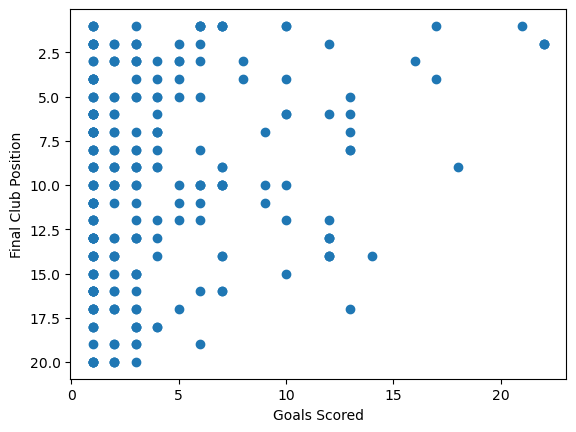

In [30]:
#scatter plot for all goal scores and what team they are on
plt.scatter(at_least_1_goal['goals'], at_least_1_goal['club_result'])
plt.gca().invert_yaxis()
plt.ylabel('Final Club Position')
plt.xlabel('Goals Scored')

In [31]:
#creating dataframe that includes the number of goals for the top goalscorer on each team.
top_scorer = pd.DataFrame(at_least_1_goal.groupby(['club_result'])['goals'].max())

Text(0.5, 0, 'Goals Scored by Top Scorer')

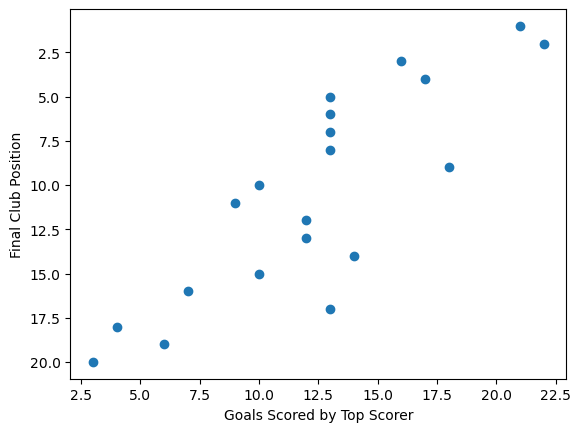

In [32]:
#scatter plot of top goalscorer for each team and their team's position in the standings
plt.scatter(top_scorer['goals'], top_scorer.index)
plt.gca().invert_yaxis()
plt.ylabel('Final Club Position')
plt.xlabel('Goals Scored by Top Scorer')

In [33]:
q2_df = final_data.drop(["Unnamed: 0","club_id","current_club_id_x","highest_market_value_in_gbp"],axis =1)

In [34]:
sum(q2_df.appearances == 0) # There are 51 players with 0 appearances in the season. Let us remove these players from our data


51

In [35]:
q2_df = q2_df[q2_df.appearances !=0]
sum(q2_df.appearances == 0)

0

In [36]:
q2_df.groupby(['position'])['position'].count()

position
Attack        152
Defender      173
Goalkeeper     35
Midfield      119
Name: position, dtype: int64

<AxesSubplot:ylabel='Frequency'>

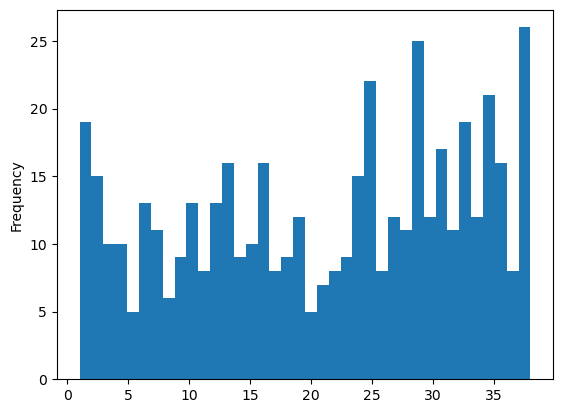

In [37]:
q2_df['appearances'].plot.hist(bins=38)

In [38]:
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(16,16)})

In [39]:
correlationMatrix = q2_df.corr()
correlationMatrix

,shots,shots_on_target,goals,goals_conceded,assists,saves,passes,key_passes,pass_acuuracy,tackles,...,successful_dribbles,past,appearances,player_id,height_in_cm,market_value_in_gbp,last_season,current_club_id_y,market_value,club_result
shots,1.000000,0.955096,0.877676,0.272058,0.561491,0.265778,0.361868,0.747009,0.107435,0.256541,...,0.705118,NaN,0.629475,0.052921,-0.156905,0.403364,0.140502,-0.067073,0.519608,-0.159496
shots_on_target,0.955096,1.000000,0.933178,NaN,0.540581,NaN,0.265293,0.703216,0.065539,0.137055,...,0.668386,NaN,0.550954,0.050521,-0.149730,0.403822,0.122080,-0.034890,0.551633,-0.176454
goals,0.877676,0.933178,1.000000,NaN,0.448482,NaN,0.225551,0.626129,0.065184,0.100035,...,0.600139,NaN,0.483741,0.040292,-0.120502,0.370254,0.100488,-0.022548,0.514237,-0.199302
goals_conceded,0.272058,NaN,NaN,1.000000,NaN,0.947461,0.672310,0.506878,-0.023852,-0.156525,...,0.324864,NaN,0.876640,-0.175302,-0.140743,0.052794,0.242959,-0.239389,0.178669,0.228228
assists,0.561491,0.540581,0.448482,NaN,1.000000,NaN,0.385125,0.755179,0.197392,0.180476,...,0.426936,NaN,0.441865,-0.022878,-0.123261,0.392549,0.100115,-0.118020,0.482353,-0.350833
saves,0.265778,NaN,NaN,0.947461,NaN,1.000000,0.782488,0.545046,0.069750,-0.164268,...,0.412262,NaN,0.926910,-0.201907,-0.212494,0.177774,0.282404,-0.222547,0.311028,0.034834
passes,0.361868,0.265293,0.225551,0.672310,0.385125,0.782488,1.000000,0.513420,0.409524,0.657427,...,0.317174,NaN,0.699834,-0.103694,-0.041775,0.318076,0.203342,-0.120172,0.434097,-0.347577
key_passes,0.747009,0.703216,0.626129,0.506878,0.755179,0.545046,0.513420,1.000000,0.192987,0.412342,...,0.673428,NaN,0.613791,-0.007466,-0.278348,0.322115,0.111204,-0.032257,0.420294,-0.184647
pass_acuuracy,0.107435,0.065539,0.065184,-0.023852,0.197392,0.069750,0.409524,0.192987,1.000000,0.216970,...,0.134175,NaN,0.140514,0.007105,-0.214888,0.187446,0.111877,0.004731,0.224995,-0.334503
tackles,0.256541,0.137055,0.100035,-0.156525,0.180476,-0.164268,0.657427,0.412342,0.216970,1.000000,...,0.322960,NaN,0.602369,-0.043477,-0.067104,0.125966,0.139766,-0.042910,0.140348,0.034596


<AxesSubplot:>

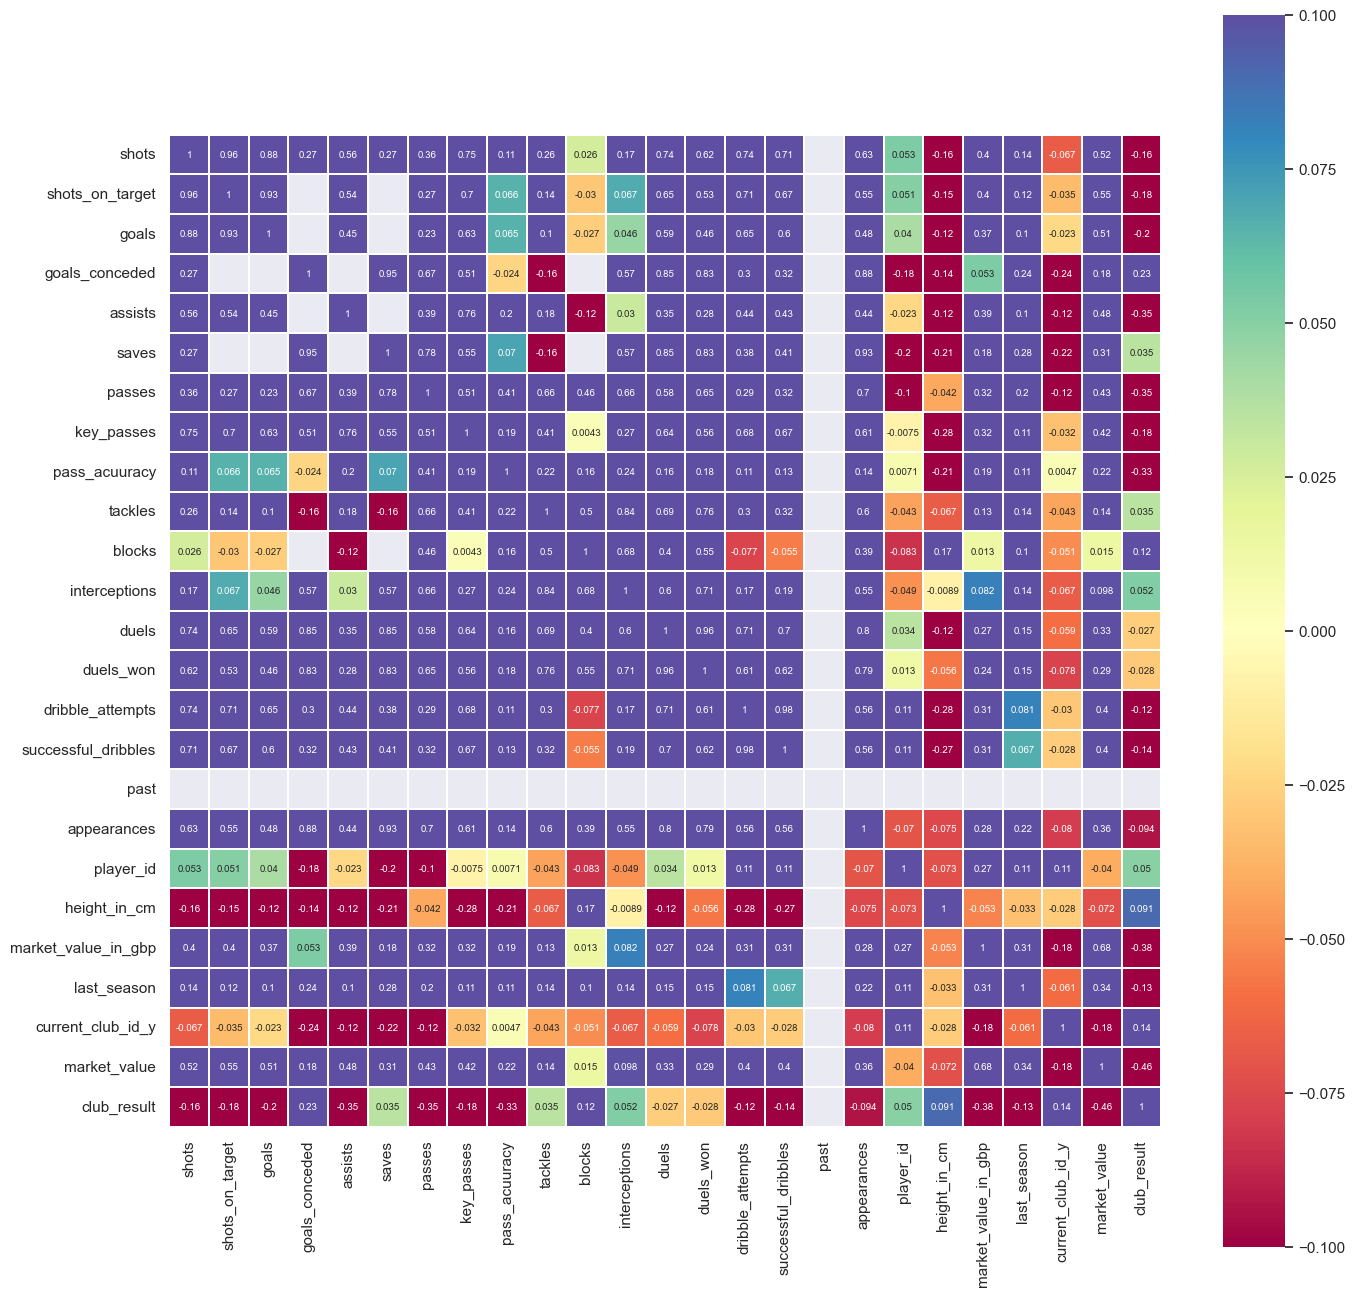

In [40]:
sns.heatmap(correlationMatrix, vmin = correlationMatrix.values.min(), annot=True, vmax =1, square=True, cmap="Spectral", linewidths=0.1,annot_kws={"size": 35 / np.sqrt(len(correlationMatrix))})